In [1]:
import scanpy as sc

import sys
sys.path.append("../resources/")
import sct
import numpy as np
import pandas as pd 

from sklearn.manifold import TSNE
import sklearn

In [2]:
adata = sc.read_h5ad('../data/knot_24h_48h_adult.h5ad')
adata

AnnData object with n_obs × n_vars = 464 × 17474 
    obs: 'stage', 'HDBSCAN', 'PN_type', 'genotype', 'n_counts', 'n_genes'
    uns: 'HDBSCAN_colors', 'PN_type_colors', 'stage_colors'
    obsm: 'X_tsne'

In [3]:
df_libs = pd.read_csv("../data/libs.csv", sep="\t", header=0, index_col=0) # sample info

In [4]:
genes_GH146_ICIM = []
with open("../data/ICIM_genes/24h_ICIM_561.txt") as f:
    for line in f:
        genes_GH146_ICIM.append(line.rstrip())

print("Total ICIM genes= ", len(genes_GH146_ICIM))

Total ICIM genes=  561


In [5]:
adata_24h = adata[adata.obs['stage']== '24h']
adata_48h = adata[adata.obs['stage']== '48h']
adata_adult = adata[adata.obs['stage']== 'adult']

In [ ]:
X = adata_24h.to_df().T
myTSNE = sct.TSNE(X.loc[genes_GH146_ICIM], X, df_libs)
myTSNE.calc_TSNE(perplexity=12, learning_rate=250, early_exaggeration=4.0, method="exact", random_state=1)

[t-SNE] Computed conditional probabilities for sample 114 / 114
[t-SNE] Mean sigma: 0.180677
[t-SNE] Iteration 50: error = 11.6913968, gradient norm = 0.2658780 (50 iterations in 0.062s)
[t-SNE] Iteration 100: error = 13.7356899, gradient norm = 0.2140219 (50 iterations in 0.067s)
[t-SNE] Iteration 150: error = 11.9178390, gradient norm = 0.2526315 (50 iterations in 0.060s)
[t-SNE] Iteration 200: error = 13.2704631, gradient norm = 0.2418225 (50 iterations in 0.070s)
[t-SNE] Iteration 250: error = 12.7129567, gradient norm = 0.2472022 (50 iterations in 0.062s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 12.712957
[t-SNE] Iteration 300: error = 0.4352538, gradient norm = 0.0249910 (50 iterations in 0.070s)
[t-SNE] Iteration 350: error = 0.2625548, gradient norm = 0.0065395 (50 iterations in 0.069s)


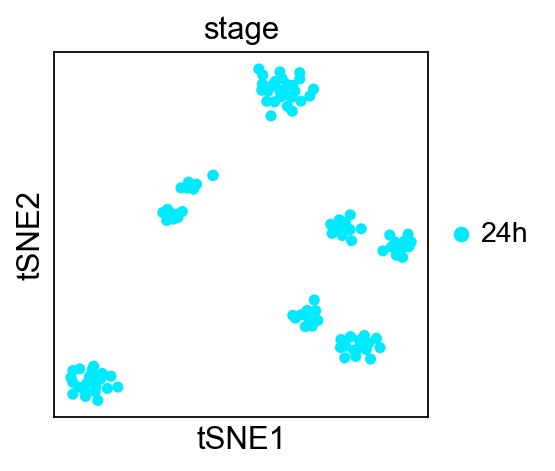

In [8]:
adata_24h.obsm['X_tsne'] = myTSNE.X_tsne
adata_24h.uns['stage_colors'] = ['#00eaff']
sc.set_figure_params(dpi_save=600,figsize=(3,3))
sc.pl.tsne(adata_24h, color='stage', size=(100,100))#, save='_24h.pdf')

In [9]:
X = adata_48h.to_df().T
myTSNE = sct.TSNE(X.loc[genes_GH146_ICIM], X, df_libs)
myTSNE.calc_TSNE(perplexity=12, learning_rate=250, early_exaggeration=4.0, method="exact", random_state=1)

[t-SNE] Computed conditional probabilities for sample 209 / 209
[t-SNE] Mean sigma: 0.157941
[t-SNE] Iteration 50: error = 15.6833648, gradient norm = 0.2211188 (50 iterations in 0.113s)
[t-SNE] Iteration 100: error = 15.3255323, gradient norm = 0.2238365 (50 iterations in 0.132s)
[t-SNE] Iteration 150: error = 15.9565497, gradient norm = 0.2284530 (50 iterations in 0.130s)
[t-SNE] Iteration 200: error = 15.3120179, gradient norm = 0.2214743 (50 iterations in 0.137s)
[t-SNE] Iteration 250: error = 14.6302200, gradient norm = 0.2423160 (50 iterations in 0.122s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 14.630220
[t-SNE] Iteration 300: error = 0.6642976, gradient norm = 0.0042125 (50 iterations in 0.130s)
[t-SNE] Iteration 350: error = 0.6408905, gradient norm = 0.0008615 (50 iterations in 0.128s)
[t-SNE] Iteration 400: error = 0.6337677, gradient norm = 0.0004208 (50 iterations in 0.125s)
[t-SNE] Iteration 450: error = 0.6302635, gradient norm = 0.0002981 (50 i

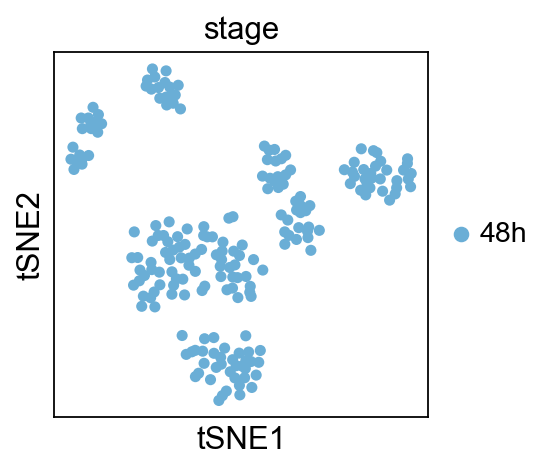

In [10]:
adata_48h.obsm['X_tsne'] = myTSNE.X_tsne
adata_48h.uns['stage_colors'] = ['#00aeff']
sc.pl.tsne(adata_48h, color='stage', size=(100,100))#, save='_48h.pdf')

[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 0.134476
[t-SNE] Iteration 50: error = 14.5821840, gradient norm = 0.2386900 (50 iterations in 0.069s)
[t-SNE] Iteration 100: error = 15.2576382, gradient norm = 0.2348446 (50 iterations in 0.080s)
[t-SNE] Iteration 150: error = 15.8251290, gradient norm = 0.2159627 (50 iterations in 0.079s)
[t-SNE] Iteration 200: error = 15.9491483, gradient norm = 0.2279380 (50 iterations in 0.087s)
[t-SNE] Iteration 250: error = 16.5478906, gradient norm = 0.2082070 (50 iterations in 0.078s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 16.547891
[t-SNE] Iteration 300: error = 0.6581164, gradient norm = 0.0107833 (50 iterations in 0.087s)
[t-SNE] Iteration 350: error = 0.5843250, gradient norm = 0.0035156 (50 iterations in 0.070s)
[t-SNE] Iteration 400: error = 0.5741024, gradient norm = 0.0024185 (50 iterations in 0.089s)
[t-SNE] Iteration 450: error = 0.5720929, gradient norm = 0.0004969 (50 i

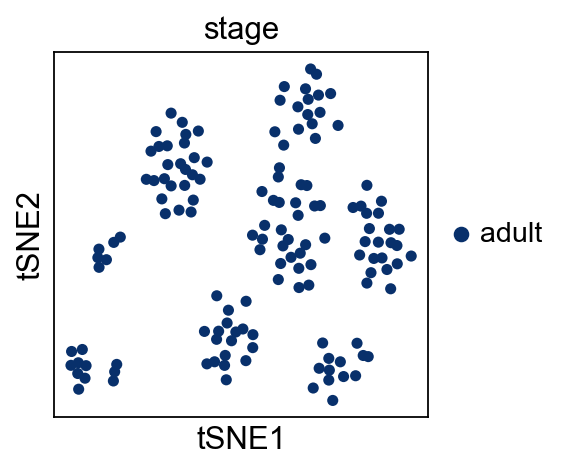

In [11]:
X = adata_adult.to_df().T
myTSNE = sct.TSNE(X.loc[genes_GH146_ICIM], X, df_libs)
myTSNE.calc_TSNE(perplexity=12, learning_rate=250, early_exaggeration=4.0, method="exact", random_state=1)
adata_adult.obsm['X_tsne'] = myTSNE.X_tsne

In [ ]:
adata_48h.uns['stage_colors'] = ['#0055ff']
sc.pl.tsne(adata_adult, color='stage', size=(100,100))#, save='_adult.pdf')

In [7]:
adata.uns['stage_colors'] = ['#00eaff','#00aeff','#0055ff']

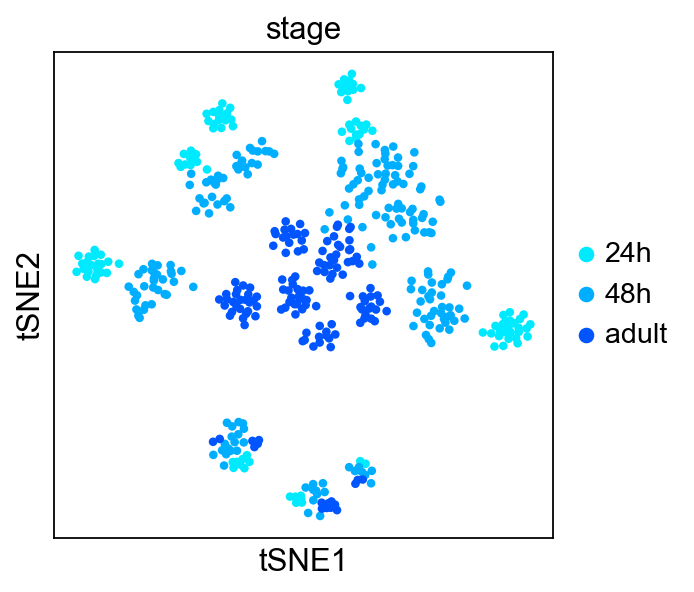

In [8]:
sc.settings.set_figure_params(dpi_save=600, figsize=(4,4))
sc.pl.tsne(adata, color='stage',size=(60,60),save='_stage.pdf')

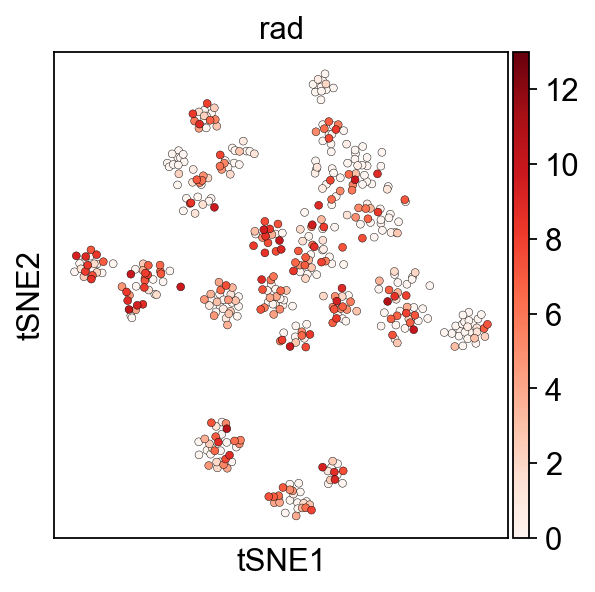

In [13]:
# myGenes =['mirr', 'ara', 'CG9650','CG17839','DIP-theta','MESR3','run']
# myGenes =['tsh', 'trol', 'C15','Lim1','trol','CG8861','CG1402','CG9896','CG1688','caup']
# myGenes =['acj6']
# myGenes =['Fas3','Pvf3','rad']
myGenes =['rad']
for gene in myGenes:
    sc.pl.tsne(adata, color=gene, size=(50,50), edgecolor="k", linewidths=0.2, vmax=13,
               color_map="Reds", save= '_'+gene+'.pdf')

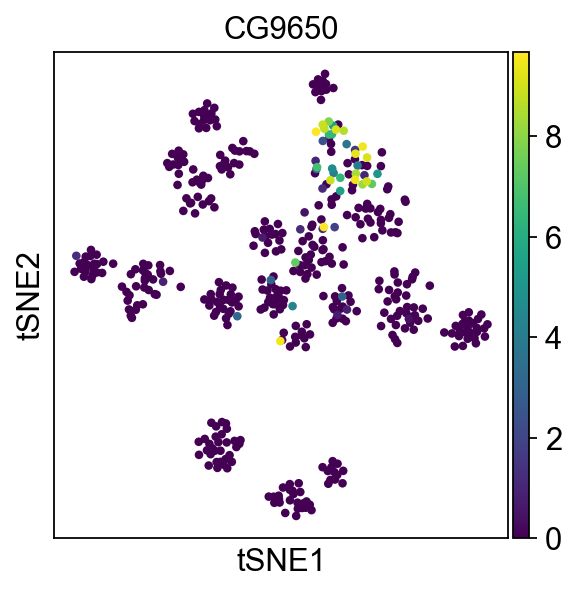

In [12]:
sc.pl.tsne(adata, color='CG9650',size=(60,60))